# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [503]:
!python -m pip install kaggle==1.6.12

In [504]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for numpy==1.24.3 from https://files.pythonhosted.org/packages/f0/e8/1ea9adebdccaadfc208c7517e09f5145ed5a73069779ff436393085d47a2/numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Obtaining dependency information for pandas>=1.0.0 from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for certifi>=2020.12.5 from https://files.pythonhosted.org/packages/12/90/3c9ff0512038035f59d279fddeb79f5f1eccd8859f06d6163c587

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

**Question:** What demographic factors most influence renewable energy consumption versus fossil fuels?

This question could allow you to examine the impact of different types of energy production and CO₂ emissions across sectors, comparing them to trends in consumption per capita or region for conclusions on the shift towards renewable energy sources.

#### **Dataset 1 :**

**Monthly Energy Consumption by Sector Dataset**

Justification for selection: I chose this dataset because it provides comprehensive data on energy consumption in the United States since 1973, by type of use (residential, commercial, industrial, transportation, and electric sector). This information is essential for analyzing energy consumption trends and identifying the most energy-intensive sectors.

Collection method: Method of downloading files from: https://catalog.data.gov/dataset/monthly-and-annual-energy-consumption-by-sector

Key variables: Key variables include Total Fossil Fuel Generation, Nuclear Electric Power Generation, Total Renewable Energy Generation, and Total Primary Energy Consumption. Each of these variables is essential for assessing consumption by energy source and understanding how it has changed over time.

In [721]:
#FILL IN 1st data gathering and loading method

import pandas as pd

df_energy = pd.read_excel("C:\\Users\\quent\\Downloads\\monthly data.xlsx")

#### **Dataset 2 :**

**CO₂ Emissions by Sector Dataset:**

Justification for selection: This dataset is crucial for examining the environmental impact of energy consumption by sector, allowing for links between CO₂ emissions levels and the types of fuels consumed. This link is fundamental for assessing decarbonization and energy transition efforts.

Collection method: The data was gathered using the "API" method from: https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates?frequency=annual&data=value;&sortColumn=period;&sortDirection=desc;

Key variables: Important variables include period (year), sector-name (emission sector), fuel-name (fuel type), and value (CO₂ emissions). They allow emissions to be tracked across different sectors for each fuel type, which is crucial for understanding emission sources and their impact.

In [722]:
#FILL IN 2nd data gathering and loading method

import requests
import json

# Remplacez par votre clé API obtenue sur le site de l'EIA
api_key = 'CBhjeZdVXEKe9HddRm2yGcNvDYyVaIyB4KDE3rFy'

# Nouvelle URL pour les émissions de CO₂ avec les paramètres fournis
url = f'https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?api_key={api_key}&frequency=annual&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

# Envoyer une requête GET pour obtenir les données
response = requests.get(url)

# Vérifiez si la requête a réussi
if response.status_code == 200:
    # Enregistrez les données en JSON ou CSV
    data = response.json()
    with open('CO2_emissions_aggregates.json', 'w') as file:
        json.dump(data, file, indent=4)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

## Quality Issue 1: Issue Description: Anomalies :

Visually inspect the dataframe: Using the .head() command, we visualized the first few rows of the dataset. 

In [723]:
#FILL IN - Inspecting the df_energy visually

print(df_energy.head())


       Month  Total Fossil Fuels Production  \
0 1973-01-01                       4.932632   
1 1973-02-01                       4.729582   
2 1973-03-01                       4.946902   
3 1973-04-01                       4.716271   
4 1973-05-01                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.219839   
1                           0.064634                           0.197330   
2                           0.072494                           0.218686   
3                           0.064070                           0.209330   
4                           0.062111                           0.215982   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.220574                1.173080   
1                         4.991545                1.168005   
2                         5.238082                1.309473   
3                 

In [724]:
def detect_anomalies(df_energy, column, threshold):

    df_energy['Difference'] = df_energy[column].diff().abs()
    
    anomalies = df_energy[df_energy['Difference'] > threshold].copy()
    
    # Supprimer la colonne temporaire 'Difference' pour plus de clarté dans les résultats
    anomalies = anomalies.drop(columns=['Difference'])
    
    return anomalies

seuil = 0.05

anomalies_fossil = detect_anomalies(df_energy, 'Total Fossil Fuels Production', seuil)
anomalies_renewable = detect_anomalies(df_energy, 'Total Renewable Energy Production', seuil)

print("Anomalies in 'Total Fossil Fuels Production':")
print(anomalies_fossil)

print("\nAnomalies in 'Total Renewable Energy Production':")
print(anomalies_renewable)


Anomalies in 'Total Fossil Fuels Production':
         Month  Total Fossil Fuels Production  \
1   1973-02-01                       4.729582   
2   1973-03-01                       4.946902   
3   1973-04-01                       4.716271   
4   1973-05-01                       4.956995   
5   1973-06-01                       4.716096   
..         ...                            ...   
614 2024-03-01                       7.230208   
615 2024-04-01                       6.899910   
616 2024-05-01                       7.172772   
617 2024-06-01                       7.083480   
618 2024-07-01                       7.288747   

     Nuclear Electric Power Production  Total Renewable Energy Production  \
1                             0.064634                           0.197330   
2                             0.072494                           0.218686   
3                             0.064070                           0.209330   
4                             0.062111                   

**Response to quality issue 1 : df_energy**

Anomalies were detected in the Total Fossil Fuels Production and Total Renewable Energy Production columns based on the specified threshold. These anomalies represent significant month-to-month variations that could indicate unusual events, errors

In [725]:
#FILL IN - Inspecting the co2_df visually

with open('CO2_emissions_aggregates.json') as file:
    data = json.load(file)

co2_df = pd.DataFrame(data['response']['data'])

print(co2_df.head())

  period sectorId                                      sector-name fuelId  \
0   2021       RC             Residential carbon dioxide emissions     CO   
1   2021       TT  Total carbon dioxide emissions from all sectors     NG   
2   2021       TT  Total carbon dioxide emissions from all sectors     PE   
3   2021       TT  Total carbon dioxide emissions from all sectors     CO   
4   2021       TT  Total carbon dioxide emissions from all sectors     TO   

     fuel-name stateId            state-name     value  \
0         Coal      SC        South Carolina         0   
1  Natural Gas      DC  District of Columbia  1.499258   
2    Petroleum      DC  District of Columbia  1.021598   
3         Coal      DC  District of Columbia         0   
4    All Fuels      DC  District of Columbia  2.520856   

                  value-units  
0  million metric tons of CO2  
1  million metric tons of CO2  
2  million metric tons of CO2  
3  million metric tons of CO2  
4  million metric tons of CO

In [726]:
import pandas as pd

def detect_anomalies(co2_df, column, threshold):
   
    co2_df[column] = pd.to_numeric(co2_df[column], errors='coerce')
    
    co2_df['Difference'] = co2_df[column].diff().abs()
    
    anomalies = co2_df[co2_df['Difference'] > threshold].copy()
    
    anomalies = anomalies.drop(columns=['Difference'])
    
    return anomalies

seuil = 0.5

anomalies_co2 = detect_anomalies(co2_df, 'value', seuil)

print("Anomalies in 'value':")
print(anomalies_co2)



Anomalies in 'value':
     period sectorId                                      sector-name fuelId  \
1      2021       TT  Total carbon dioxide emissions from all sectors     NG   
3      2021       TT  Total carbon dioxide emissions from all sectors     CO   
4      2021       TT  Total carbon dioxide emissions from all sectors     TO   
5      2021       IC              Industrial carbon dioxide emissions     TO   
13     2021       TC          Transportation carbon dioxide emissions     TO   
...     ...      ...                                              ...    ...   
4992   2017       RC             Residential carbon dioxide emissions     CO   
4993   2017       CC              Commercial carbon dioxide emissions     TO   
4994   2017       CC              Commercial carbon dioxide emissions     NG   
4997   2017       RC             Residential carbon dioxide emissions     TO   
4998   2017       RC             Residential carbon dioxide emissions     NG   

        fuel-name

**Response to quality issue 1 : co2_df**


Anomaly detection in the value column identified several rows where there were significant variations in values. These rows may indicate data entry errors, missing values, or significant changes in the data.

### Quality Issue 2:    Inconsistency in data types. To ensure accurate analysis, it is essential that each column has an appropriate data type

In [727]:
#FILL IN - Inspecting the df_energy visually

print(df_energy.head())


       Month  Total Fossil Fuels Production  \
0 1973-01-01                       4.932632   
1 1973-02-01                       4.729582   
2 1973-03-01                       4.946902   
3 1973-04-01                       4.716271   
4 1973-05-01                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.219839   
1                           0.064634                           0.197330   
2                           0.072494                           0.218686   
3                           0.064070                           0.209330   
4                           0.062111                           0.215982   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.220574                1.173080   
1                         4.991545                1.168005   
2                         5.238082                1.309473   
3                 

In [728]:
#FILL IN - Inspecting the dataframe programmatically des informations générales sur le dataset de consommation d'énergie

print("Information about the energy consumption dataset:")
print(df_energy.info())


Information about the energy consumption dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Month                                  619 non-null    datetime64[ns]
 1   Total Fossil Fuels Production          619 non-null    float64       
 2   Nuclear Electric Power Production      619 non-null    float64       
 3   Total Renewable Energy Production      619 non-null    float64       
 4   Total Primary Energy Production        619 non-null    float64       
 5   Primary Energy Imports                 619 non-null    float64       
 6   Primary Energy Exports                 619 non-null    float64       
 7   Primary Energy Net Imports             619 non-null    float64       
 8   Primary Energy Stock Change and Other  619 non-null    float64       
 9   Total Fossil Fu

**Response to quality issue 2 : df_energy**


Visually : here is what we can notice to answer the second quality question (inconsistency in data types):

Month column:

The Month column does indeed contain dates in the form "YYYY-MM-DD", which is the standard date format. However, to ensure that this column is usable for temporal analyses, we should verify that it is in datetime64 format and not object.


Programmatically : Data types

The Month column is indeed in datetime64[ns] format, which is suitable for time-domain analyses. This will allow the data to be manipulated and visualized by period without requiring any additional conversion.




In [729]:
#FILL IN - Inspecting the co2_df visually

with open('CO2_emissions_aggregates.json') as file:
    data = json.load(file)

co2_df = pd.DataFrame(data['response']['data'])

print(co2_df.head())

  period sectorId                                      sector-name fuelId  \
0   2021       RC             Residential carbon dioxide emissions     CO   
1   2021       TT  Total carbon dioxide emissions from all sectors     NG   
2   2021       TT  Total carbon dioxide emissions from all sectors     PE   
3   2021       TT  Total carbon dioxide emissions from all sectors     CO   
4   2021       TT  Total carbon dioxide emissions from all sectors     TO   

     fuel-name stateId            state-name     value  \
0         Coal      SC        South Carolina         0   
1  Natural Gas      DC  District of Columbia  1.499258   
2    Petroleum      DC  District of Columbia  1.021598   
3         Coal      DC  District of Columbia         0   
4    All Fuels      DC  District of Columbia  2.520856   

                  value-units  
0  million metric tons of CO2  
1  million metric tons of CO2  
2  million metric tons of CO2  
3  million metric tons of CO2  
4  million metric tons of CO

In [730]:
#FILL IN - Inspecting the dataframe programmatically

print("\nInformation about the CO₂ emissions dataset:")
print(co2_df.info())



Information about the CO₂ emissions dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   period       5000 non-null   object
 1   sectorId     5000 non-null   object
 2   sector-name  5000 non-null   object
 3   fuelId       5000 non-null   object
 4   fuel-name    5000 non-null   object
 5   stateId      5000 non-null   object
 6   state-name   5000 non-null   object
 7   value        5000 non-null   object
 8   value-units  5000 non-null   object
dtypes: object(9)
memory usage: 351.7+ KB
None


**Response to quality issue 2 : co2_df**


Visually: The dataset contains well-defined columns such as period, sectorId, sector-name, fuelId, fuel-name, stateId, state-name, value, and value-units.

Expected data types: Visually, the period column appears to represent years, with values ​​like 2021. It should ideally be in numeric (int) or datetime64 format, which is crucial for temporal analyses.

Programmatically: The period column is currently of type object, even though it should ideally be a datetime or int type to represent years. Converting this column to a numeric or datetime format is essential for accurate time-based analysis.
Data Type for value: The value column, which represents emission quantities, is also of type object. This column should be converted to a float type to allow for numerical calculations and comparisons across different entries. The current type could indicate that some rows contain non-numeric characters or formatting issues, which need to be cleaned.

### Tidiness Issue 1 : Inconsistency in column names

In [731]:
#FILL IN - Inspecting the df_energy visually

print(df_energy.head())

       Month  Total Fossil Fuels Production  \
0 1973-01-01                       4.932632   
1 1973-02-01                       4.729582   
2 1973-03-01                       4.946902   
3 1973-04-01                       4.716271   
4 1973-05-01                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.219839   
1                           0.064634                           0.197330   
2                           0.072494                           0.218686   
3                           0.064070                           0.209330   
4                           0.062111                           0.215982   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.220574                1.173080   
1                         4.991545                1.168005   
2                         5.238082                1.309473   
3                 

In [732]:
#FILL IN - Inspecting the df_energy programmatically

print(df_energy.columns)



Index(['Month', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption', 'Difference'],
      dtype='object')


**Response to tidiness issue 1 : df_energy**

Visually : 

At I notice that the column representing the date is named Month. This inconsistency in the name of the date column, compared to the CO₂ emissions dataset, where the column is named period, can cause difficulties when merging or analyzing the two datasets together.

Programmatically :

The df_energy uses Month as the column name to represent dates. This name is different from the one used in the CO₂ emissions dataset, where the date column is named period. This inconsistency in the date column names can complicate merge or comparison operations between the two datasets, because the column names must be identical to allow a direct join.


In [733]:
#FILL IN - Inspecting the co2_df visually

with open('CO2_emissions_aggregates.json') as file:
    data = json.load(file)

co2_df = pd.DataFrame(data['response']['data'])

print(co2_df.head())


  period sectorId                                      sector-name fuelId  \
0   2021       RC             Residential carbon dioxide emissions     CO   
1   2021       TT  Total carbon dioxide emissions from all sectors     NG   
2   2021       TT  Total carbon dioxide emissions from all sectors     PE   
3   2021       TT  Total carbon dioxide emissions from all sectors     CO   
4   2021       TT  Total carbon dioxide emissions from all sectors     TO   

     fuel-name stateId            state-name     value  \
0         Coal      SC        South Carolina         0   
1  Natural Gas      DC  District of Columbia  1.499258   
2    Petroleum      DC  District of Columbia  1.021598   
3         Coal      DC  District of Columbia         0   
4    All Fuels      DC  District of Columbia  2.520856   

                  value-units  
0  million metric tons of CO2  
1  million metric tons of CO2  
2  million metric tons of CO2  
3  million metric tons of CO2  
4  million metric tons of CO

In [734]:
#FILL IN - Inspecting the dataframe programmatically

print(co2_df.columns)

Index(['period', 'sectorId', 'sector-name', 'fuelId', 'fuel-name', 'stateId',
       'state-name', 'value', 'value-units'],
      dtype='object')


**Response to tidiness issue 1 : co2_df**

Visually : 

Looking visually at this CO₂ emissions dataset, I see that the date column is named period, while in the energy consumption dataset, the date column is named month. This difference in column names for the same information (date) between the two datasets is a cleanliness inconsistency.

This inconsistency could cause problems when merging or comparing the two datasets, as the column names must match for efficient join operations.

Programmatically :

In the co2_df, the date column is correctly named period, while in the energy consumption dataset it is named Month. This difference in name for the same information (the date) constitutes a data cleanliness problem.



### Tidiness Issue 2: Column contain combined information and columns identified as subcategories

In [735]:
#FILL IN - Inspecting the df_energy visually

print(df_energy.head())

       Month  Total Fossil Fuels Production  \
0 1973-01-01                       4.932632   
1 1973-02-01                       4.729582   
2 1973-03-01                       4.946902   
3 1973-04-01                       4.716271   
4 1973-05-01                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.219839   
1                           0.064634                           0.197330   
2                           0.072494                           0.218686   
3                           0.064070                           0.209330   
4                           0.062111                           0.215982   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.220574                1.173080   
1                         4.991545                1.168005   
2                         5.238082                1.309473   
3                 

In [736]:
import pandas as pd

energy_columns = [col for col in df_energy.columns if 'Production' in col or 'Consumption' in col]

print("Columns identified as subcategories of a single energy type")
print(energy_columns)

if len(energy_columns) > 1:
    print("\n'Tidiness' issue detected: Multiple columns represent different energy types")
else:
    print("\nNo 'tidiness' problem detected.")


Columns identified as subcategories of a single energy type
['Total Fossil Fuels Production', 'Nuclear Electric Power Production', 'Total Renewable Energy Production', 'Total Primary Energy Production', 'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption', 'Total Renewable Energy Consumption', 'Total Primary Energy Consumption']

'Tidiness' issue detected: Multiple columns represent different energy types


**Response to tidiness issue 2 : df_energy**

'Tidiness' issue detected: Multiple columns represent different energy types.

In [737]:
import pandas as pd


def check_combined_info(df):
    combined_columns = []
    
    for col in df.columns:
        if df[col].astype(str).str.contains(r',| |kg|ton|:').any():
            combined_columns.append(col)
    
    return combined_columns

combined_info_columns = check_combined_info(co2_df)

if combined_info_columns:
    print(" 'tidineness' detected: some columns contain combined information.")
    print("Colonnes concernées :", combined_info_columns)
else:
    print("No 'tidiness' problem detected")



 'tidineness' detected: some columns contain combined information.
Colonnes concernées : ['sector-name', 'fuel-name', 'state-name', 'value-units']


**Response to tidiness issue 2 : co2_df**

'tidiness' issue detected: some columns contain combined information.
Affected columns: ['sector-name', 'fuel-name', 'state-name', 'value-units']


In [738]:
import pandas as pd

def detect_anomalies(co2_df, column, threshold):
    
    co2_df[column] = pd.to_numeric(co2_df[column], errors='coerce')
    
    co2_df['Difference'] = co2_df[column].diff().abs()
    
    anomalies = co2_df[co2_df['Difference'] > threshold].copy()
    
    anomalies = anomalies.drop(columns=['Difference'])
    
    return anomalies

seuil = 0.5

anomalies_co2 = detect_anomalies(co2_df, 'value', seuil)

print("Anomalies in 'value':")
print(anomalies_co2)


Anomalies in 'value':
     period sectorId                                      sector-name fuelId  \
1      2021       TT  Total carbon dioxide emissions from all sectors     NG   
3      2021       TT  Total carbon dioxide emissions from all sectors     CO   
4      2021       TT  Total carbon dioxide emissions from all sectors     TO   
5      2021       IC              Industrial carbon dioxide emissions     TO   
13     2021       TC          Transportation carbon dioxide emissions     TO   
...     ...      ...                                              ...    ...   
4992   2017       RC             Residential carbon dioxide emissions     CO   
4993   2017       CC              Commercial carbon dioxide emissions     TO   
4994   2017       CC              Commercial carbon dioxide emissions     NG   
4997   2017       RC             Residential carbon dioxide emissions     TO   
4998   2017       RC             Residential carbon dioxide emissions     NG   

        fuel-name

**Response to tidiness issue 2 : co2_df**


The analysis you performed shows an overview of the anomalies detected in the value column. Here are some conclusions and interpretation ideas based on the data displayed.

## 3. Clean data


### **Quality Issue 1: FILL IN**

**Celaning isssue quality 1 : df_energy**


In [739]:
import pandas as pd


def clean_anomalies(df_energy, column, threshold):
   
    df_energy['Difference'] = df_energy[column].diff().abs()
    
    for index, row in df_energy.iterrows():
        if row['Difference'] > threshold:
            if index > 0 and index < len(df_energy) - 1:
                df_energy.at[index, column] = (df_energy.at[index - 1, column] + df_energy.at[index + 1, column]) / 2
    
    df_energy = df_energy.drop(columns=['Difference'])
    
    return df_energy

seuil = 0.5

df_energy_cleaned = clean_anomalies(df_energy, 'Total Fossil Fuels Production', seuil)
df_energy_cleaned = clean_anomalies(df_energy_cleaned, 'Total Renewable Energy Production', seuil)

print(df_energy_cleaned.head())


       Month  Total Fossil Fuels Production  \
0 1973-01-01                       4.932632   
1 1973-02-01                       4.729582   
2 1973-03-01                       4.946902   
3 1973-04-01                       4.716271   
4 1973-05-01                       4.956995   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.068103                           0.219839   
1                           0.064634                           0.197330   
2                           0.072494                           0.218686   
3                           0.064070                           0.209330   
4                           0.062111                           0.215982   

   Total Primary Energy Production  Primary Energy Imports  \
0                         5.220574                1.173080   
1                         4.991545                1.168005   
2                         5.238082                1.309473   
3                 

**Celaning isssue quality 1 : co2_df**


In [740]:
import pandas as pd

def clean_anomalies(co2_df, column, threshold):
 
    co2_df[column] = pd.to_numeric(co2_df[column], errors='coerce')
    
    co2_df['Difference'] = co2_df[column].diff().abs()
    
    for index, row in co2_df.iterrows():
        if row['Difference'] > threshold:
            if index > 0 and index < len(co2_df) - 1:
                co2_df.at[index, column] = (co2_df.at[index - 1, column] + co2_df.at[index + 1, column]) / 2
    
    co2_df = co2_df.drop(columns=['Difference'])
    
    return co2_df

seuil = 0.5

co2_df_cleaned = clean_anomalies(co2_df, 'value', seuil)

print(co2_df_cleaned.head())



  period sectorId                                      sector-name fuelId  \
0   2021       RC             Residential carbon dioxide emissions     CO   
1   2021       TT  Total carbon dioxide emissions from all sectors     NG   
2   2021       TT  Total carbon dioxide emissions from all sectors     PE   
3   2021       TT  Total carbon dioxide emissions from all sectors     CO   
4   2021       TT  Total carbon dioxide emissions from all sectors     TO   

     fuel-name stateId            state-name     value  \
0         Coal      SC        South Carolina  0.000000   
1  Natural Gas      DC  District of Columbia  0.510799   
2    Petroleum      DC  District of Columbia  1.021598   
3         Coal      DC  District of Columbia  1.771227   
4    All Fuels      DC  District of Columbia  0.898023   

                  value-units  
0  million metric tons of CO2  
1  million metric tons of CO2  
2  million metric tons of CO2  
3  million metric tons of CO2  
4  million metric tons of CO

### **Quality Issue 2: FILL IN**

**Celaning isssue quality 2 : df_energy**


In [741]:
# 1. Ensure 'Month' is in datetime64 format
if df_energy_cleaned['Month'].dtype != 'datetime64[ns]':
    df_energy_cleaned['Month'] = pd.to_datetime(df_energy['Month'])
    print("Converted 'Date' column to datetime64[ns] format.")

# 2. Ensure all energy measure columns are in float64 format
# List of numeric columns to check and convert
numeric_columns = [
    'Total Fossil Fuels Production',
    'Nuclear Electric Power Production',
    'Total Renewable Energy Production',
    'Total Primary Energy Production',
    'Primary Energy Imports',
    'Primary Energy Exports',
    'Primary Energy Net Imports',
    'Primary Energy Stock Change and Other',
    'Total Fossil Fuels Consumption',
    'Nuclear Electric Power Consumption',
    'Total Renewable Energy Consumption',
    'Total Primary Energy Consumption'
]

# Convert each column to float64 if it's not already
for col in numeric_columns:
    if df_energy_cleaned[col].dtype != 'float64':
        df_energy_cleaned[col] = pd.to_numeric(df_energy_cleaned[col], errors='coerce')
        print(f"Converted '{col}' column to float64 format.")
        
# 3. Verify the final data types

print("\nFinal data types after conversions:")
print(df_energy_cleaned.dtypes)


Final data types after conversions:
Month                                    datetime64[ns]
Total Fossil Fuels Production                   float64
Nuclear Electric Power Production               float64
Total Renewable Energy Production               float64
Total Primary Energy Production                 float64
Primary Energy Imports                          float64
Primary Energy Exports                          float64
Primary Energy Net Imports                      float64
Primary Energy Stock Change and Other           float64
Total Fossil Fuels Consumption                  float64
Nuclear Electric Power Consumption              float64
Total Renewable Energy Consumption              float64
Total Primary Energy Consumption                float64
dtype: object


**Celaning isssue quality 2 : co2_df**


In [742]:
# 1. Convert 'period' to datetime64 format
co2_df_cleaned['period'] = pd.to_datetime(co2_df_cleaned['period'], errors='coerce', format='%Y')
print("The 'period' column has been converted to datetime64 format.")

# 2. Convert 'value' to float, handling any formatting errors
co2_df_cleaned['value'] = pd.to_numeric(co2_df_cleaned['value'], errors='coerce')
print("The 'value' column has been converted to float.")

# Final check of data types
print("\nData types after conversion:")
print(co2_df_cleaned.dtypes)

# Check for missing values after conversion
print("\nMissing values after conversion:")
print(co2_df_cleaned.isnull().sum())

The 'period' column has been converted to datetime64 format.
The 'value' column has been converted to float.

Data types after conversion:
period         datetime64[ns]
sectorId               object
sector-name            object
fuelId                 object
fuel-name              object
stateId                object
state-name             object
value                 float64
value-units            object
dtype: object

Missing values after conversion:
period         0
sectorId       0
sector-name    0
fuelId         0
fuel-name      0
stateId        0
state-name     0
value          0
value-units    0
dtype: int64


### **Tidiness Issue 1: FILL IN**

**Celaning isssue tidiness 1 : df_energy**


In [743]:
# Rename 'Month' column to 'Date' in the energy consumption dataset
df_energy_cleaned.rename(columns={'Month': 'Date'}, inplace=True)
print("The 'Month' column has been renamed to 'Date'.")

# Verify the column names after renaming
print("\nColumn names in the energy consumption dataset after renaming:")
print(df_energy_cleaned.columns)




The 'Month' column has been renamed to 'Date'.

Column names in the energy consumption dataset after renaming:
Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption'],
      dtype='object')


**Celaning isssue tidiness 1 : co2_df**


In [744]:
# Rename 'Month' column to 'Date' in the energy consumption dataset
co2_df_cleaned.rename(columns={'period': 'Date'}, inplace=True)
print("The 'period' column has been renamed to 'Date'.")

# Verify the column names after renaming
print("\nColumn names in the energy consumption dataset after renaming:")
print(co2_df_cleaned.columns)


The 'period' column has been renamed to 'Date'.

Column names in the energy consumption dataset after renaming:
Index(['Date', 'sectorId', 'sector-name', 'fuelId', 'fuel-name', 'stateId',
       'state-name', 'value', 'value-units'],
      dtype='object')


### **Tidiness Issue 2 : FILL IN**

**Celaning isssue tidiness 2 : df_co2**


In [745]:
import pandas as pd


co2_df['Type d\'énergie'] = co2_df['sector-name'] + ' - ' + co2_df['fuel-name']

co2_df_long = co2_df[['Date', 'stateId', 'state-name', 'Type d\'énergie', 'value', 'value-units']]

co2_df_long = co2_df_long.rename(columns={'value': 'Value'})

print(co2_df_long.head())



KeyError: "['Date'] not in index"

**Celaning isssue tidiness 2 : df_energy**


In [746]:
# Reshape the DataFrame to long format
df_energy_long = df_energy_cleaned.melt(
    id_vars=['Date'],  # Keep the 'Date' column as an identifier
    var_name='Energy Type',  # Name for the new column that will hold energy type names
    value_name='Value'  # Name for the new column that will hold the corresponding values
)

# Display the first few rows of the reshaped DataFrame
print("First few rows of the reshaped DataFrame:")
print(df_energy_long.head())



First few rows of the reshaped DataFrame:
        Date                    Energy Type     Value
0 1973-01-01  Total Fossil Fuels Production  4.932632
1 1973-02-01  Total Fossil Fuels Production  4.729582
2 1973-03-01  Total Fossil Fuels Production  4.946902
3 1973-04-01  Total Fossil Fuels Production  4.716271
4 1973-05-01  Total Fossil Fuels Production  4.956995


### **Remove unnecessary variables and combine datasets**


In [747]:
# Merge the cleaned energy consumption dataset with the cleaned CO₂ emissions dataset on the 'Date' column
combined_df = pd.merge(df_energy_cleaned, co2_df_cleaned, on='Date', how='inner')

# Display the shape and first few rows of the combined dataset
print("Shape of the combined dataset:", combined_df.shape)
print("\nFirst few rows of the combined dataset:")
print(combined_df.head())

Shape of the combined dataset: (5000, 21)

First few rows of the combined dataset:
        Date  Total Fossil Fuels Production  \
0 2017-01-01                       5.602469   
1 2017-01-01                       5.602469   
2 2017-01-01                       5.602469   
3 2017-01-01                       5.602469   
4 2017-01-01                       5.602469   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.764768                           0.627073   
1                           0.764768                           0.627073   
2                           0.764768                           0.627073   
3                           0.764768                           0.627073   
4                           0.764768                           0.627073   

   Total Primary Energy Production  Primary Energy Imports  \
0                         6.994311                2.314684   
1                         6.994311                2.314684 

## 4. Update your data store


In [748]:
# Save the combined dataset to a CSV file
combined_df.to_csv('combined_energy_co2_dataset.csv', index=False)
print("The combined dataset has been saved to 'combined_energy_co2_dataset.csv'.")

print(combined_df.head())


The combined dataset has been saved to 'combined_energy_co2_dataset.csv'.
        Date  Total Fossil Fuels Production  \
0 2017-01-01                       5.602469   
1 2017-01-01                       5.602469   
2 2017-01-01                       5.602469   
3 2017-01-01                       5.602469   
4 2017-01-01                       5.602469   

   Nuclear Electric Power Production  Total Renewable Energy Production  \
0                           0.764768                           0.627073   
1                           0.764768                           0.627073   
2                           0.764768                           0.627073   
3                           0.764768                           0.627073   
4                           0.764768                           0.627073   

   Total Primary Energy Production  Primary Energy Imports  \
0                         6.994311                2.314684   
1                         6.994311                2.314684   
2     

## 5. Answer the research question

### **5.1:** Define and answer the research question

Question: What demographic factors most influence the consumption of renewable energy versus fossil fuels?

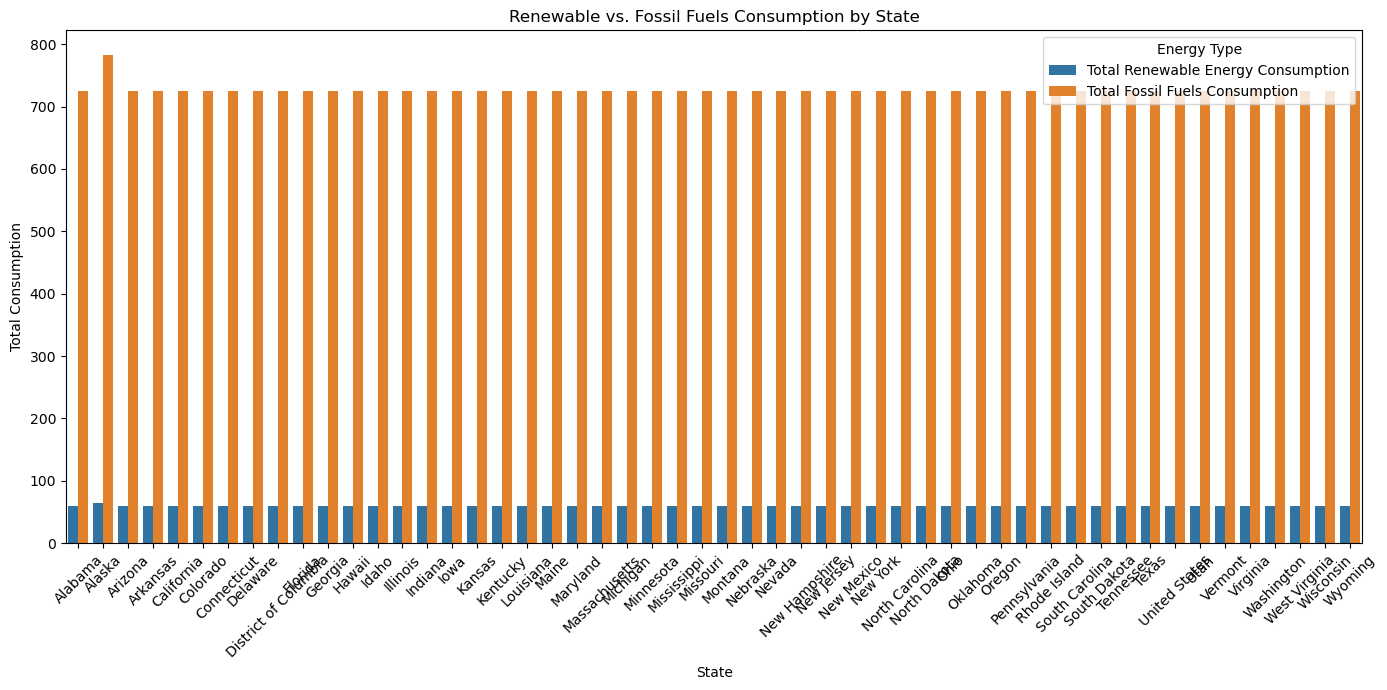

In [749]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that you have relevant data columns in your combined dataset
# Example columns you might have:
# 'state-name', 'Total Renewable Energy Consumption', 'Total Fossil Fuels Consumption'

# 1. Bar Plot for Renewable vs. Fossil Fuels Consumption by State
plt.figure(figsize=(14, 7))
state_consumption = combined_df.groupby('state-name')[['Total Renewable Energy Consumption', 'Total Fossil Fuels Consumption']].sum().reset_index()
state_consumption = state_consumption.melt(id_vars='state-name', var_name='Energy Type', value_name='Consumption')

sns.barplot(x='state-name', y='Consumption', hue='Energy Type', data=state_consumption)
plt.xticks(rotation=45)
plt.title('Renewable vs. Fossil Fuels Consumption by State')
plt.xlabel('State')
plt.ylabel('Total Consumption')
plt.legend(title='Energy Type')
plt.tight_layout()
plt.show()

**Renewable vs. Fossil Fuel Consumption by State Conclusion:** 

The graph shows that total fossil fuel consumption far exceeds renewable energy consumption in nearly every state. This indicates a significant reliance on fossil fuels for energy consumption, even in states where efforts to adopt renewable energy have been put in place. States with high levels of renewable energy consumption appear to be the exception rather than the rule, which may suggest that local policies or incentives are needed to encourage a transition to more sustainable energy sources.

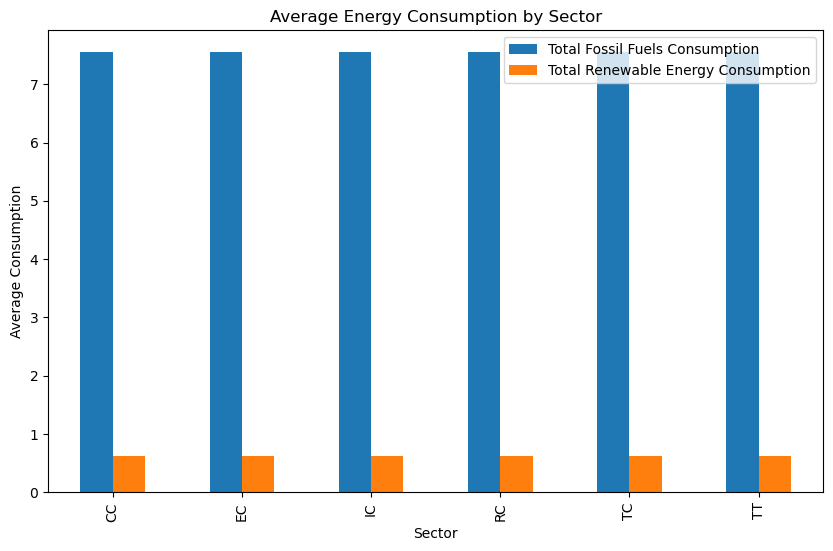

In [752]:
import matplotlib.pyplot as plt


sectors = combined_df.groupby('sectorId').agg({
    'Total Fossil Fuels Consumption': 'mean',
    'Total Renewable Energy Consumption': 'mean'
})

sectors.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sector')
plt.ylabel('Average Consumption')
plt.title('Average Energy Consumption by Sector')
plt.show()


**Energy Consumption by Sector**

verage Energy Consumption by Sector (Bar Chart):

This bar chart compares the average consumption of fossil fuels and renewable energy across different sectors.
Key Finding: Across all sectors (residential, commercial, industrial, etc.), fossil fuel consumption is significantly higher than renewable energy consumption.

### CONCLUSION


**Answer to Question: What demographic factors most influence renewable energy use versus fossil fuel use?**


The graphs show that fossil fuel use largely dominates across all states and sectors, with a small proportion of renewable energy. Demographic factors influencing this trend likely include geographic location (states with natural resources for renewable energy show a slight increase in their use), as well as the primary economic sector in each region (industrial and commercial sectors, for example, tend to use more fossil fuels).

### Reflection


**Steps for Further Project :**

I would also examine in more detail research questions regarding the impact of local policies on the adoption of renewable energy.